# mnist (tensorflow 2.x)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# 리턴 순서
# X_train, y_trian, X_test, y_Test
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# 60000만 사진이  28 ,28형태
print("X_train.shape",X_train.shape)

X_train = X_train.reshape(60000, 784)

print("X_train.reshape", X_train.shape)

X_train.shape (60000, 28, 28)
X_train.reshape (60000, 784)


In [ ]:
print("y_train.shape" ,y_train.shape)

y_train = y_train.reshape(60000, 1)

print("y_train.shape" ,y_train.shape)

y_train.shape (60000,)
y_train.shape (60000, 1)


In [ ]:
enc = OneHotEncoder()

enc.fit(y_train)

y_train_onehot = enc.transform(y_train).toarray()

y_train_onehot = np.array(y_train_onehot, dtype="float32")

In [ ]:
model = Sequential()

model.add(Dense(200, input_dim=784, activation="sigmoid"))

model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train_onehot,  batch_size = 100, epochs =10)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.4960 - acc: 0.8669
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3039 - acc: 0.9140
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2737 - acc: 0.9218
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2541 - acc: 0.9265
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2371 - acc: 0.9308
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2269 - acc: 0.9339
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2250 - acc: 0.9323
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2120 - acc: 0.9369
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2060 - acc: 0.9389
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2031 - acc: 0.9392


In [ ]:
print("X_test_shape : ",X_test.shape)
# 10000줄에 28 * 28 형태인데 이것을 한줄로 쭉 펴야함: fully_connected

X_test = X_test.reshape(-1, 784)
print("X_test.shape", X_test.shape)

X_test_shape :  (10000, 28, 28)
X_test.shape (10000, 784)


In [ ]:
# 순서 섞기
np.random.shuffle(X_test)

In [ ]:
images = X_test[0:10]

# 보기어럽네
predict = model.predict(images)

print("예측값 날것, 보기 어렵네 :\n",predict[0])

# 각 줄에서 최댓값이 있는 인덱스 리턴
predict01 = np.argmax(predict,1)
print("최대값이 있는인덱스(예측값) :",predict01)

예측값 날것, 보기 어렵네 :
 [3.0178316e-03 2.6103196e-04 3.4340256e-04 1.0426299e-02 2.4468469e-04
 8.8101618e-02 5.7722436e-04 8.1161226e-05 8.9294904e-01 3.9977883e-03]
최대값이 있는인덱스(예측값) : [8 0 4 6 6 9 1 6 5 6]


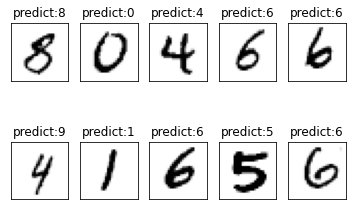

In [ ]:
fig = plt.figure()

for i in range(10):
  # 서브플롯 2행 5열
  subplot = fig.add_subplot(2, 5, i+1)

  subplot.imshow(images[i].reshape(28, 28),cmap ='Greys')
  subplot.set_xticks([])
  subplot.set_yticks([])

  subplot.set_title("predict:%d" % predict01[i])

# 합성곱 실습

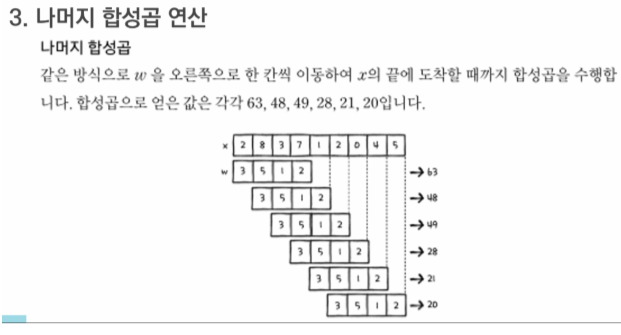

In [ ]:
import numpy as np

In [ ]:
x = [2, 8, 3, 7, 1, 2, 0, 4, 5]
w= [3, 5, 1, 2]

In [ ]:
for i in range(6):
  print("x[{} : {}] = {}".format(i, i+4, x[i : i+4]))

x[0 : 4] = [2, 8, 3, 7]
x[1 : 5] = [8, 3, 7, 1]
x[2 : 6] = [3, 7, 1, 2]
x[3 : 7] = [7, 1, 2, 0]
x[4 : 8] = [1, 2, 0, 4]
x[5 : 9] = [2, 0, 4, 5]


In [ ]:
# 합성곱 연산
print("첫 번쨰 합성곱 연샨", np.dot(x[0:4] ,w))

print("두 번쨰 합성곱 연샨", np.dot(x[1:5] ,w))

첫 번쨰 합성곱 연샨 63
두 번쨰 합성곱 연샨 48


In [ ]:
# 합성곱 연산 - for문 
for i in range(6):
    print("x[{}:{}]*w ={}".format(i, i+4,  np.dot( x[i:i+4], w)  ))

x[0:4]*w =63
x[1:5]*w =48
x[2:6]*w =49
x[3:7]*w =28
x[4:8]*w =21
x[5:9]*w =20


In [ ]:
# 합성곱 연산 - 자동으로 해주는 툴이 있음
from scipy.signal import correlate

In [ ]:
# 결과
correlate(x, w, mode = 'valid')

# 결과를 보니 원래 x는 9개의 값을 가짐 
# -> 6개로 줄어듬


array([63, 48, 49, 28, 21, 20])

In [ ]:
# 줄어들면 안됌
# 따라서 연산 값도 9개가 나올수있게 양쪽 끝에 0을 채워줌
# 패딩
# 원본 배열에 왼쪽에 0 두개 오른쪽에 0 한개 추가
x = [2, 8, 3, 7, 1, 2, 0, 4, 5]
w= [2, 1, 5, 3]
correlate(x, w, mode= 'same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

# 패딩과 스트라이드 

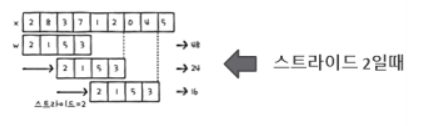

In [ ]:
# 스트라이드는 미끄러지는 간격을 조정함

In [ ]:
x = np.array([
              [1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]
])

w = np.array([
    [2, 0],
    [0, 0]
])

In [ ]:
from scipy.signal import correlate2d

In [ ]:
print(" mode = 'valid':\n",correlate2d(x, w, mode = 'valid'))

# 값이 줄어드니까 배열에 0을 채워서 값을 9개가 나오게함
print("model = 'same' \n",correlate2d(x, w, mode = 'same'))

 mode = 'valid':
 [[ 2  4]
 [ 8 10]]
model = 'same' 
 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


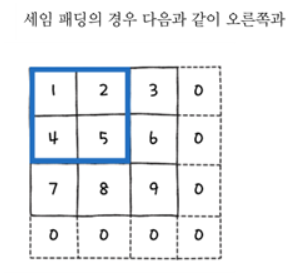

# 텐서플로를 이용한 합성곱 연산

In [ ]:
%tensorflow_version 1.x

In [ ]:
import tensorflow as tf
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
x = np.array(
                [
                 [1,2,3],
                 [4,5,6],
                 [7,8,9]
                ]
             , dtype="float32")

w = np.array([
              [2,0],
              [0,0]
            ])

([], <a list of 0 Text major ticklabel objects>)

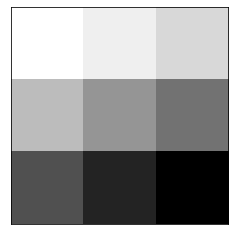

In [ ]:
plt.imshow(x, cmap = 'Greys')
plt.xticks([])
plt.yticks([])

In [ ]:
print("w.shape : ", w.shape)
print("x.shape : ", x.shape)

w.shape (2, 2)
w.reshape (2, 2, 1, 1)


In [ ]:
x = x.reshape(1, 3 , 3 ,1)
w = w.reshape(2, 2, 1, 1)

print("w.reshape: ",w.shape)
print("x.reshape: ",x.shape)

w.reshape:  (2, 2, 1, 1)
x.reshape:  (1, 3, 3, 1)


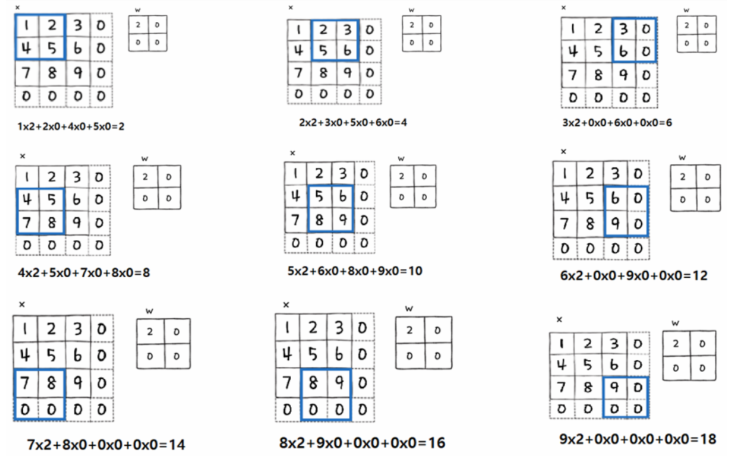

In [ ]:
conv = tf.nn.conv2d(x, w , strides=1, padding="SAME")
conv

<tf.Tensor: id=4, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 2.],
         [ 4.],
         [ 6.]],

        [[ 8.],
         [10.],
         [12.]],

        [[14.],
         [16.],
         [18.]]]], dtype=float32)>

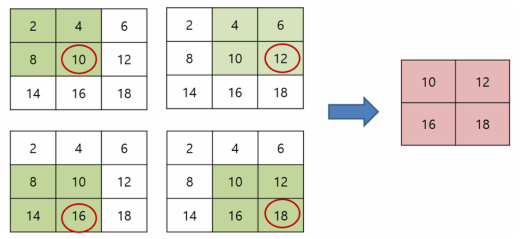

In [ ]:
# tf.nn.max_pool2d : MaxPooling
# ksize = 2 : 2줄 2칸을 그룹으로 함
# stride= 1 : 1 칸식 이동하면서 맥스 풀링
# conv : 맥스플링 실행할 배열
tf.nn.max_pool2d(conv, ksize=2, strides=1, padding="VALID")

<tf.Tensor: id=5, shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[10.],
         [12.]],

        [[16.],
         [18.]]]], dtype=float32)>

# 실습

## 딥러닝을 이용한 MNIST 이미지 분류 (텐서플로 2.x)

- 395 ~ 410

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# train
print("X_train" ,X_train.shape)

# 차원 변환
X_train =  X_train.reshape(60000, 784)

# 차원 변환 후 shape
print("X_train",X_train.shape)

# y.shape
print("y_train" ,y_train.shape)

# 차원 변환
y_train =  y_train.reshape(-1, 1)

# 차원 변화 후 shape
print("y_train" ,y_train.shape)

X_train (60000, 784)
X_train (60000, 784)
y_train (60000,)
y_train (60000, 1)


In [ ]:
# test
# X shape
print("X_test" ,X_test.shape)

# 차원 변환
X_test =  X_test.reshape(-1, 784)

# 차원 변환 후 shape
print("X_test",X_test.shape)

# y.shape
print("y_test" ,y_test.shape)

# 차원 변환
y_test =  y_test.reshape(-1, 1)

# 차원 변화 후 shape
print("y_test" ,y_test.shape)

X_test (10000, 784)
X_test (10000, 784)
y_test (10000, 1)
y_test (10000, 1)


In [ ]:
print("학습셋 이미지 수 : {} 개".format(X_train.shape[0]))
print("테스트셋 이미지 수 : {} 개".format(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [ ]:
# 인코딩 객체
enc = OneHotEncoder()

# y_train 학습 (종류 몇개)
enc.fit(y_train)

# train 
# 인코딩 한 데이터를 numpy배열로 변환
y_train_onehot = enc.transform(y_train).toarray()

# 타입 변환
y_train_onehot = np.array(y_train_onehot, dtype="float32")

# test
# 인코딩 한 데이터를 numpy배열로 변환
y_test_onehot = enc.transform(y_test).toarray()

# 타입 변환
y_test_onehot = np.array(y_test_onehot, dtype="float32")

In [ ]:
# 객체 생성
model = Sequential()

# 입력 784 칸
# 출력 200칸
# 활성화 함수 sigmoid
model.add(Dense(200, input_dim=784, activation="sigmoid"))

# 인풋은 전 Dense
# 출력은 10칸
# 출력은 왜 10칸? --> 숫자가 0~9
model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['acc'])

model.fit(X_train, y_train_onehot, epochs = 10, batch_size = 100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.5051 - acc: 0.8642
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2973 - acc: 0.9167
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2625 - acc: 0.9251
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2481 - acc: 0.9284
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2297 - acc: 0.9332
Epoch 6/10
600/600 [===============

In [ ]:
# 예측
predict = model.predict(X_test)

# argmax,1 : 각 줄의 최대값이 있는 부분 인덱스 리턴
predict01 =np.argmax(predict, 1)

target = np.argmax(y_test_onehot, 1)

predict02 = (predict01 == target)

# 정확도 계산
acc = np.sum(predict02)/len(predict02)

print("Acc:",acc)

Acc: 0.9437


## 파이썬 합성곱 연산

- 452 ~481

In [ ]:
import numpy as np
from scipy.signal import correlate, correlate2d

In [ ]:
# 배열
x = [2, 8, 3, 7, 1, 2, 0, 4, 5]

# 합성곱 필터
w= [3, 5, 1, 2]

In [ ]:
# 합성곱 연산 - for문 
print("all x:",x)
for i in range(6):
  print("x[{} : {}] = {}".format(i, i+4, x[i : i+4]))
print("=" * 100)

# 합성곱 해보기
for i in range(6):
    print("x[{} : {}] * w ={}".format(i, i+4,  np.dot( x[i:i+4], w)  ))

all x: [2, 8, 3, 7, 1, 2, 0, 4, 5]
x[0 : 4] = [2, 8, 3, 7]
x[1 : 5] = [8, 3, 7, 1]
x[2 : 6] = [3, 7, 1, 2]
x[3 : 7] = [7, 1, 2, 0]
x[4 : 8] = [1, 2, 0, 4]
x[5 : 9] = [2, 0, 4, 5]
x[0 : 4] * w =63
x[1 : 5] * w =48
x[2 : 6] * w =49
x[3 : 7] * w =28
x[4 : 8] * w =21
x[5 : 9] * w =20


In [ ]:
# 위에걸 한방에
print("mode : valid",correlate(x, w, mode = 'valid'))

# 세임패딩 : 출력 배열의 길이를 원본 배열의 길이와 동일하게 만듬
# -> 모서리에 0을 붙임  , 이를 제로패딩을 추가한다라고 함



array([63, 48, 49, 28, 21, 20])

이차원 합성곱 연산 실습

In [ ]:
x = np.array(
                [
                 [1,2,3],
                 [4,5,6],
                 [7,8,9]
                ]
             , dtype="float32")

w = np.array([
              [2,0],
              [0,0]
            ])

In [ ]:
# 그냥 곱하기 - > 원본 배열크기랑 달라짐
print("valid:\n",correlate2d(x, w, mode = 'valid'))

# 패딩추가후 2차원 배열 곱셈
print("same:\n",correlate2d(x, w, mode = 'same'))

valid:
 [[ 2.  4.]
 [ 8. 10.]]
same:
 [[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]]


텐서플로를 이용한 합성곱 연산

- 이미지는 4차원 배열
- 텐서플로에서 합성곱 입력(이미지)는 3차원 이미지들이 여러개 있는 4차원 배열

- 가중치(필터)는 3차원 이미지들이 여러개 있는 4차원 배열

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
x = np.array(
                [
                 [1,2,3],
                 [4,5,6],
                 [7,8,9]
                ]
             , dtype="float32")

# 타입 변환 
x = np.array(x, dtype = 'float32')
print("x.shape :",x.shape)

# 차원 변환 (개수, 높이 , 너비 , 채널개수)
x =  x.reshape(1, 3, 3, 1)

# reshape 확인
print("x.reshape :",x.shape)

# 가중치(필터)
w = np.array([
              [2,0],
              [0,0]
            ])
# shape 확인
print("w.shape", w.shape)

# 차원 변환(너비, 높이 , 채널,  가중치 개수)
w = w.reshape(2, 2, 1, 1)

# 확인
print("w.reshape",w.shape)

x.shape : (3, 3)
x.reshape : (1, 3, 3, 1)
w.shape (2, 2)
w.reshape (2, 2, 1, 1)


In [ ]:
# 합성곱 연산 수행
conv = tf.nn.conv2d(x ,w, strides =1, padding = 'SAME')
conv

<tf.Tensor: id=2, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 2.],
         [ 4.],
         [ 6.]],

        [[ 8.],
         [10.],
         [12.]],

        [[14.],
         [16.],
         [18.]]]], dtype=float32)>

맥스풀링

- 특성맵을 스캔하며 최댓값 고르는 것

In [ ]:
# tf.nn.max_pool2d : MaxPooling
# ksize = 2 : 2줄 2칸을 그룹으로 함
# stride= 1 : 1 칸식 이동하면서 맥스 풀링
# conv : 맥스플링 실행할 배열
tf.nn.max_pool2d(conv, ksize=2, strides=1, padding="VALID")

<tf.Tensor: id=3, shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[10.],
         [12.]],

        [[16.],
         [18.]]]], dtype=float32)>